# Tag 기준으로 계산 

In [1]:
import sys, os
p = os.path.abspath('..')
pp = os.path.abspath('../..')
ppp = os.path.abspath('../../visualization')

sys.path.insert(1, ppp)
sys.path.insert(1, p)
sys.path.insert(1, pp)




In [2]:
from gc import collect

from distribution_collector import collect_tag_distributions
from utils.statistics import calculate_gini, calculate_entropy, get_dist_x_div, calc_regression
from distribution_collector import (collect_topic_distributions)
from constants import CONSTANTS

from matplotlib import pyplot as plt
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
import lib.stats.stats as st


In [3]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import matplotlib as mpl

# 직접 경로로 Helvetica 폰트 불러오기
font_path = "/System/Library/Fonts/Helvetica.ttc"
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
print(f"Registered font name: {font_name}")


Registered font name: Helvetica


In [4]:
mpl.rcParams['font.family'] = font_name

In [5]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm

# 직접 경로로 Helvetica 폰트 불러오기
font_path = "/System/Library/Fonts/Helvetica.ttc"
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
print(f"Registered font name: {font_name}")


Registered font name: Helvetica


In [6]:
tag_info = "../../visualization/result/tag/tag_info.json"
tag_dir = f'../../visualization/{CONSTANTS.tag_difficulty_data_dir[3:]}'
lda_dir = f'../../visualization/{CONSTANTS.lda_difficulty_data_dir[3:]}'
diff_dict = {'0' : 'Basic', '1' : 'Intermediate', '2' : 'Advanced'}
output_dir = './fig/'

In [7]:
print(tag_dir)

../../visualization/result/bert_based/difficulty_annotated/data


In [8]:
bert_topic_distribution = dict()
for diff_str in diff_dict.keys():
    bert_topic_distribution[diff_str] = collect_topic_distributions(window=7,
                                                                data_dir=tag_dir,
                                                                options={'difficulties': [diff_str]})
    

['2021-12-01 00:00:00', '2021-12-08 00:00:00', '2021-12-15 00:00:00', '2021-12-22 00:00:00', '2021-12-29 00:00:00', '2022-01-05 00:00:00', '2022-01-12 00:00:00', '2022-01-19 00:00:00', '2022-01-26 00:00:00', '2022-02-02 00:00:00', '2022-02-09 00:00:00', '2022-02-16 00:00:00', '2022-02-23 00:00:00', '2022-03-02 00:00:00', '2022-03-09 00:00:00', '2022-03-16 00:00:00', '2022-03-23 00:00:00', '2022-03-30 00:00:00', '2022-04-06 00:00:00', '2022-04-13 00:00:00', '2022-04-20 00:00:00', '2022-04-27 00:00:00', '2022-05-04 00:00:00', '2022-05-11 00:00:00', '2022-05-18 00:00:00', '2022-05-25 00:00:00', '2022-06-01 00:00:00', '2022-06-08 00:00:00', '2022-06-15 00:00:00', '2022-06-22 00:00:00', '2022-06-29 00:00:00', '2022-07-06 00:00:00', '2022-07-13 00:00:00', '2022-07-20 00:00:00', '2022-07-27 00:00:00', '2022-08-03 00:00:00', '2022-08-10 00:00:00', '2022-08-17 00:00:00', '2022-08-24 00:00:00', '2022-08-31 00:00:00', '2022-09-07 00:00:00', '2022-09-14 00:00:00', '2022-09-21 00:00:00', '2022-09-2

In [9]:
tag_distribution = dict()
for diff_str in diff_dict.keys():
    print(diff_str)
    tag_distribution[diff_str] = collect_tag_distributions(window=7,
                                                          tag_info = tag_info,
                                                          data_dir=tag_dir,
                                                          options={'difficulties': [diff_str]})
    

0
['2021-12-01 00:00:00', '2021-12-08 00:00:00', '2021-12-15 00:00:00', '2021-12-22 00:00:00', '2021-12-29 00:00:00', '2022-01-05 00:00:00', '2022-01-12 00:00:00', '2022-01-19 00:00:00', '2022-01-26 00:00:00', '2022-02-02 00:00:00', '2022-02-09 00:00:00', '2022-02-16 00:00:00', '2022-02-23 00:00:00', '2022-03-02 00:00:00', '2022-03-09 00:00:00', '2022-03-16 00:00:00', '2022-03-23 00:00:00', '2022-03-30 00:00:00', '2022-04-06 00:00:00', '2022-04-13 00:00:00', '2022-04-20 00:00:00', '2022-04-27 00:00:00', '2022-05-04 00:00:00', '2022-05-11 00:00:00', '2022-05-18 00:00:00', '2022-05-25 00:00:00', '2022-06-01 00:00:00', '2022-06-08 00:00:00', '2022-06-15 00:00:00', '2022-06-22 00:00:00', '2022-06-29 00:00:00', '2022-07-06 00:00:00', '2022-07-13 00:00:00', '2022-07-20 00:00:00', '2022-07-27 00:00:00', '2022-08-03 00:00:00', '2022-08-10 00:00:00', '2022-08-17 00:00:00', '2022-08-24 00:00:00', '2022-08-31 00:00:00', '2022-09-07 00:00:00', '2022-09-14 00:00:00', '2022-09-21 00:00:00', '2022-09

In [10]:
b_gini_dict, b_entropy_dict = dict(), dict()
for diff_str, topic_distribution in bert_topic_distribution.items():
    b_entropy_dict[diff_str] = list(map(lambda x: calculate_entropy(list(x.values())), topic_distribution))
    b_gini_dict[diff_str] = list(map(lambda x: calculate_gini(list(x.values())), topic_distribution))
    


In [11]:
t_gini_dict, t_entropy_dict = dict(), dict()
for diff_str, distribution in tag_distribution.items():
    t_entropy_dict[diff_str] = list(map(lambda x: calculate_entropy(list(x.values())), distribution))
    t_gini_dict[diff_str] = list(map(lambda x: calculate_gini(list(x.values())), distribution))
    


In [12]:
b_coef_dict = dict()
b_coef_dict[0] = b_gini_dict
b_coef_dict[1] = b_entropy_dict

In [13]:
alpha_dict = {0 : 'A. ', 1  : 'B. ', 2 : 'C. '}

In [14]:
t_coef_dict = dict()
t_coef_dict[0] = t_gini_dict
t_coef_dict[1] = t_entropy_dict

In [15]:
def calc_chow(x, y):
    st_ = st.Stats(np.array(x), np.array(y), 2, 0.95)
    F_stat, p_value = st_.chow_test()
    return st_, F_stat, p_value
    

In [16]:
def draw_scatter_line_plot(dict_):
    
    v_size = len(dict_[0].keys())
    calc_type_dict = { 0 : 'Gini Coefficient', 1 : 'Entropy'}

    fig, axs = plt.subplots(nrows=2, ncols=v_size,  figsize = (20, 12), sharey='row', sharex=True)
    coef_dict = dict_[0]
    for v_idx in coef_dict.keys():
        list_ = coef_dict[v_idx]
        x_rel, divider = get_dist_x_div(list_)
        st_, F_stat_, p_value_ = calc_chow(x_rel, list_)


        h_idx, v_idx = 0, int(v_idx)
        axs[0][v_idx].scatter(x_rel, list_, color = 'darkgray', alpha = 0.7,  s=10, marker='x')
        axs[0][v_idx].plot(x_rel, st_.y_predict, label="Full Model", linestyle="--", color="black")  

        axs[0][v_idx].plot(x_rel[:divider], st_.y1_predict, label="before chatGPT", linewidth='2')
        axs[0][v_idx].fill_between(x_rel[:divider], st_.y1_predict - st_.y1_conf_interval, st_.y1_predict + st_.y1_conf_interval, alpha=0.1)

        axs[0][v_idx].plot(x_rel[divider:], st_.y2_predict, label="after chatGPT", linewidth='2')
        axs[0][v_idx].fill_between(x_rel[divider:], st_.y2_predict - st_.y2_conf_interval, st_.y2_predict + st_.y2_conf_interval, alpha=0.1)

        axs[0][v_idx].axvline(x=0, color='tab:red', linestyle='-.', linewidth=1)
        axs[0][v_idx].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10)
        axs[0][v_idx].set_ylabel(f"{calc_type_dict[h_idx]}", fontsize = 10)
        axs[0][v_idx].set_title(f"{alpha_dict[v_idx]}{diff_dict[str(v_idx)]} Level")
        axs[0][v_idx].text( 0.05, 0.05, transform=axs[0][v_idx].transAxes, s=f'F-Statistic : {F_stat_:.2f}\np-value : {p_value_:.4f}', fontsize = 10) 
        axs[0][v_idx].grid(True, linestyle='--', alpha=0.3)
        
    

    coef_dict = dict_[1]
    for v_idx in coef_dict.keys():
        list_ = coef_dict[v_idx]
        x_rel, divider = get_dist_x_div(list_)
        st_, F_stat_, p_value_ = calc_chow(x_rel, list_)

        h_idx, v_idx = 1, int(v_idx)
        axs[1][v_idx].scatter(x_rel, list_, color = 'darkgray', alpha = 0.7,  s=10, marker='x')
        axs[1][v_idx].plot(x_rel, st_.y_predict, label="Full Model", linestyle="--", color="black")  

        axs[1][v_idx].plot(x_rel[:divider], st_.y1_predict, label="before chatGPT", linewidth='2')
        axs[1][v_idx].fill_between(x_rel[:divider], st_.y1_predict - st_.y1_conf_interval, st_.y1_predict + st_.y1_conf_interval, alpha=0.1)

        axs[1][v_idx].plot(x_rel[divider:], st_.y2_predict, label="after chatGPT", linewidth='2')
        axs[1][v_idx].fill_between(x_rel[divider:], st_.y2_predict - st_.y2_conf_interval, st_.y2_predict + st_.y2_conf_interval, alpha=0.1)

        axs[1][v_idx].axvline(x=0, color='tab:red', linestyle='-.', linewidth=1)
        axs[1][v_idx].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10)
        axs[1][v_idx].set_ylabel(f"{calc_type_dict[h_idx]}", fontsize = 10)
        axs[1][v_idx].set_title(f"{alpha_dict[v_idx]}{diff_dict[str(v_idx)]} Level")
        axs[1][v_idx].text( 0.05, 0.05, transform=axs[1][v_idx].transAxes, s=f'F-Statistic : {F_stat_:.2f}\np-value : {p_value_:.4f}', fontsize = 10) 
        axs[1][v_idx].grid(True, linestyle='--', alpha=0.3)
        
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig(f"{output_dir}Result_Fig6.png", dpi=300, bbox_inches='tight')


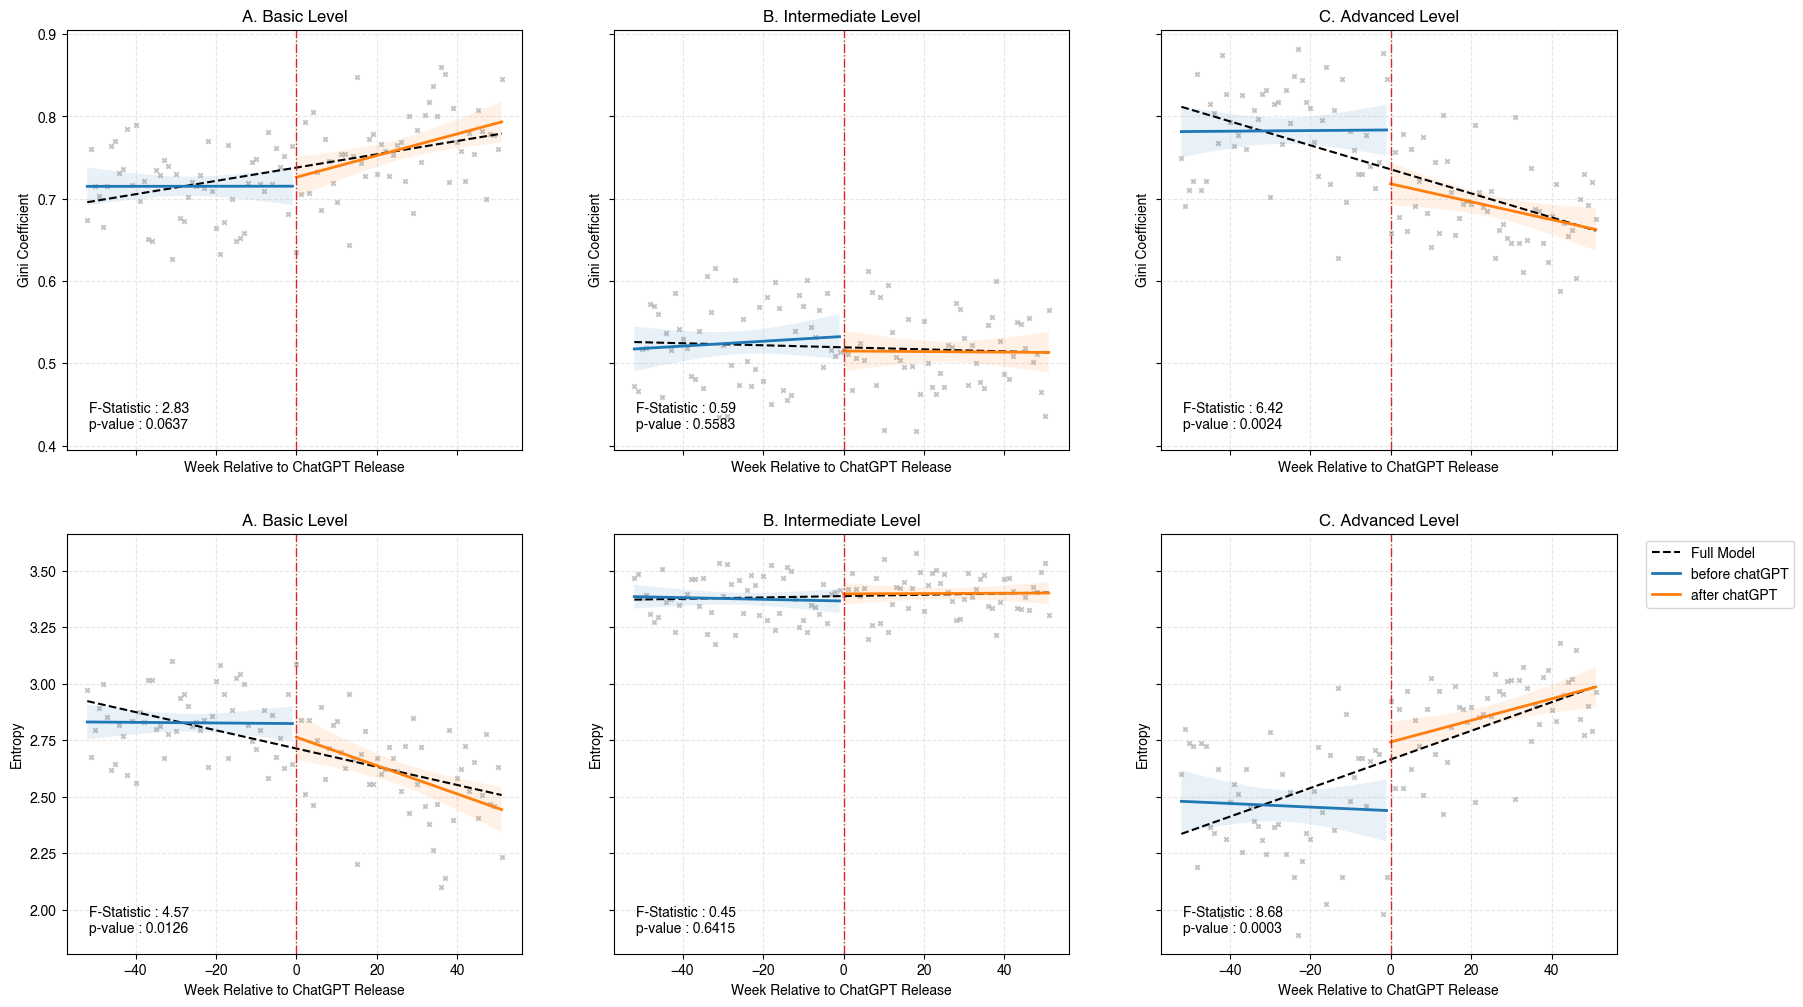

In [17]:
draw_scatter_line_plot(b_coef_dict)

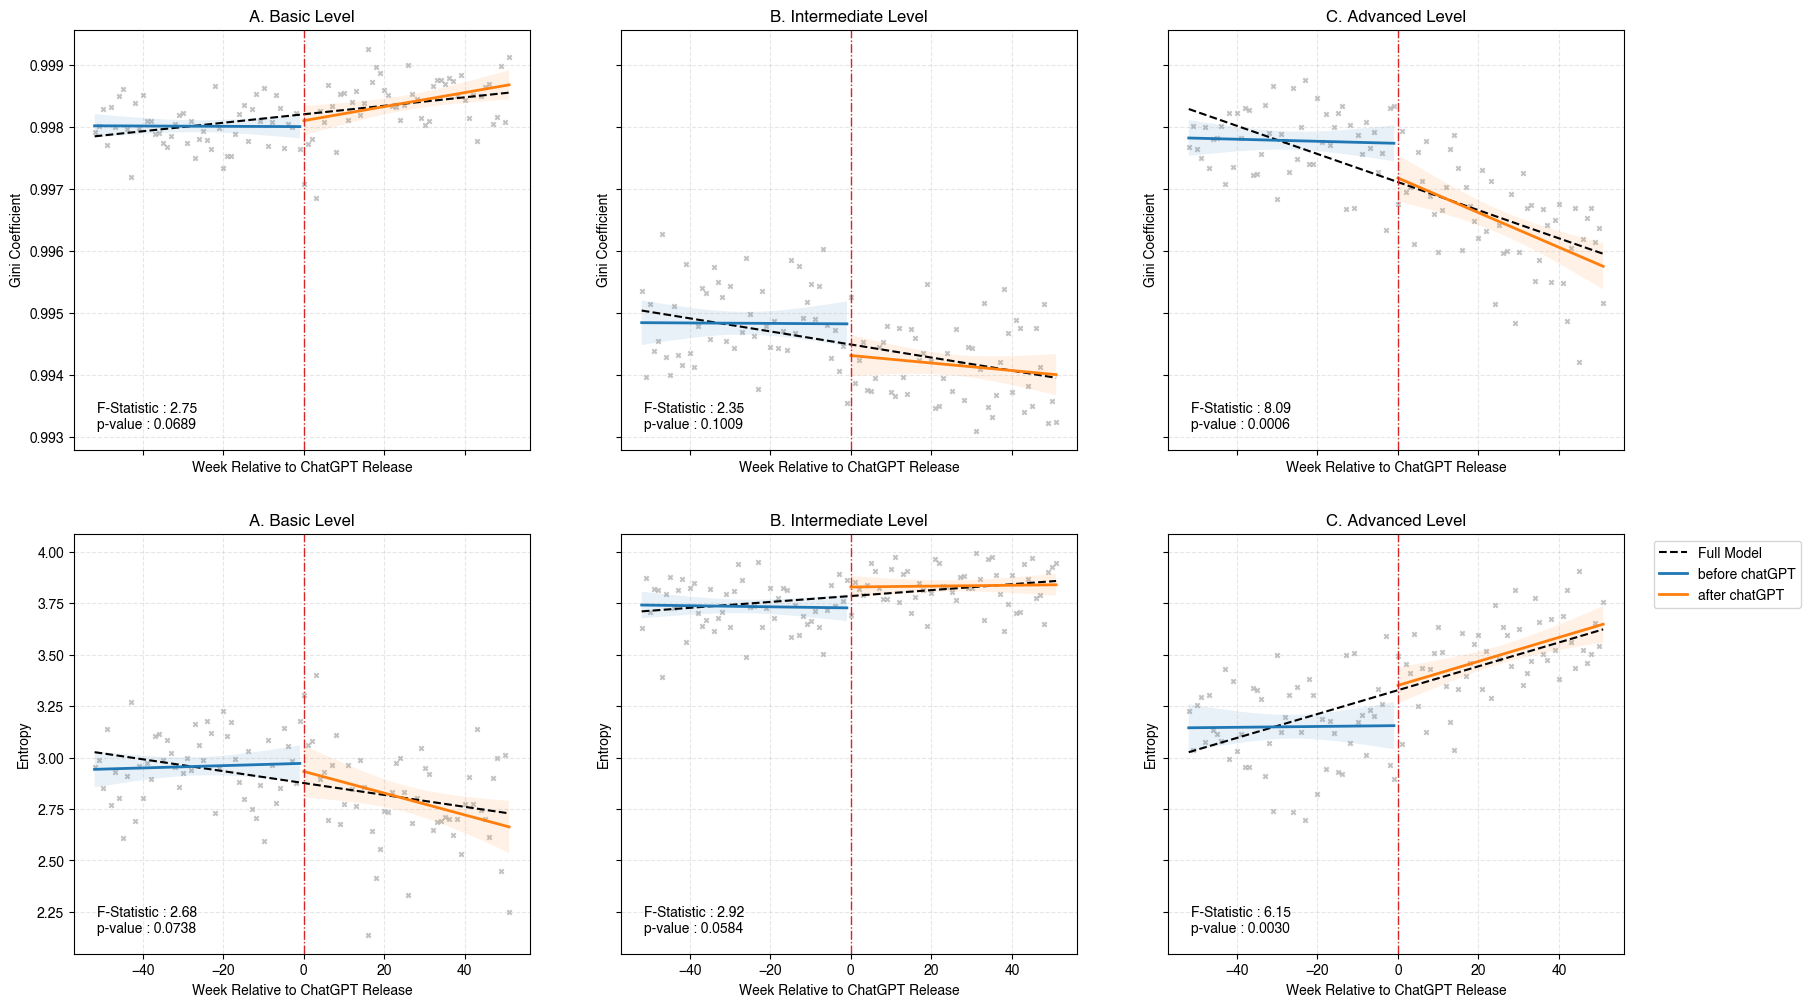

In [18]:
draw_scatter_line_plot(t_coef_dict)

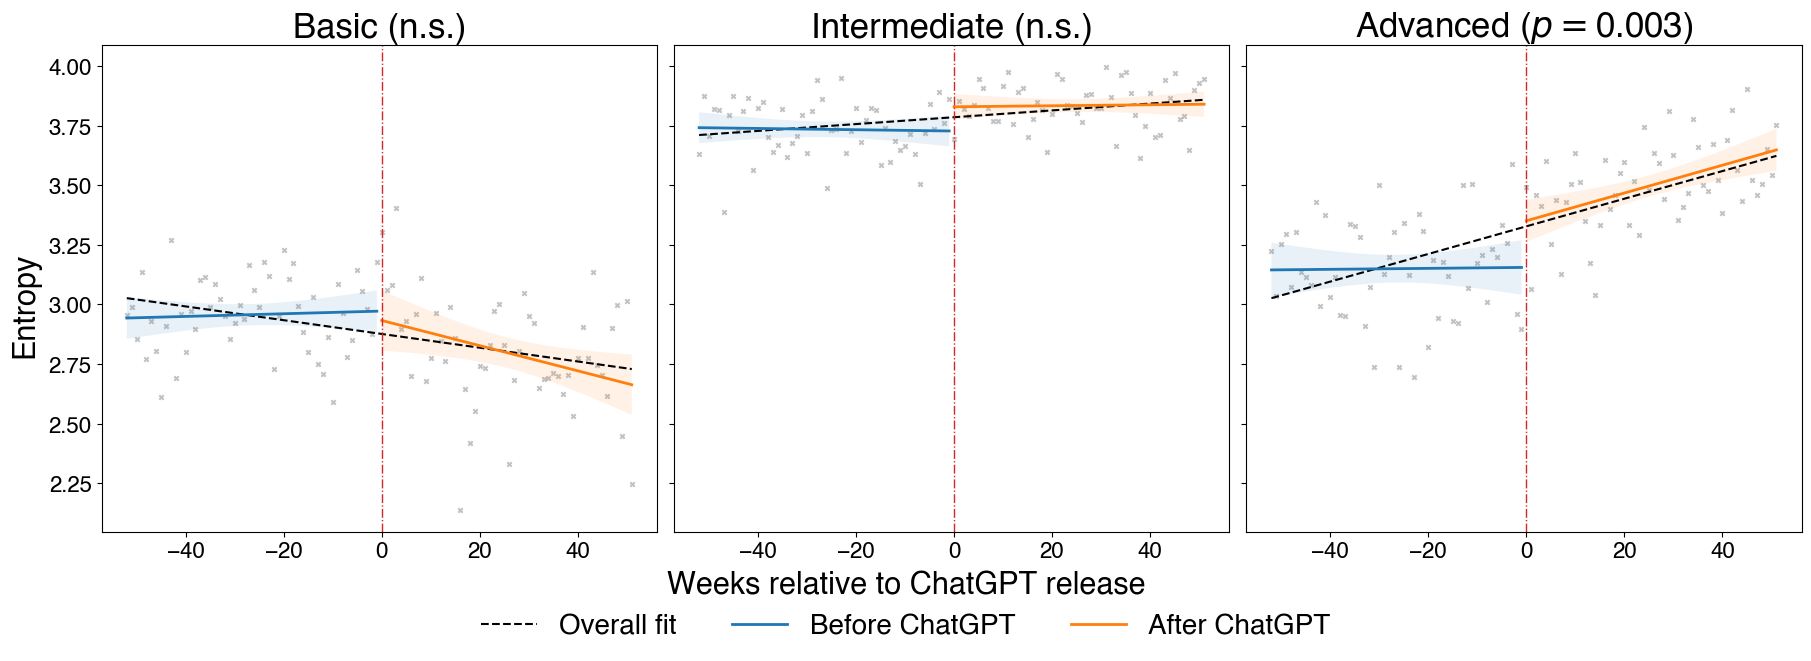

In [20]:

fig, axs = plt.subplots(1, 3, figsize = (18, 6), sharey=True, sharex=True, constrained_layout=True)

coef_dict = t_coef_dict[1]
[1]
for v_idx in coef_dict.keys():
    list_ = coef_dict[v_idx]
    x_rel, divider = get_dist_x_div(list_)
    st_, F_stat_, p_value_ = calc_chow(x_rel, list_)

    h_idx, v_idx = 1, int(v_idx)
    axs[v_idx].scatter(x_rel, list_, color = 'darkgray', alpha = 0.7,  s=10, marker='x')
    axs[v_idx].plot(x_rel, st_.y_predict, label="Overall fit", linestyle="--", color="black")  

    axs[v_idx].plot(x_rel[:divider], st_.y1_predict, label="Before ChatGPT", linewidth='2')
    axs[v_idx].fill_between(x_rel[:divider], st_.y1_predict - st_.y1_conf_interval, st_.y1_predict + st_.y1_conf_interval, alpha=0.1)

    axs[v_idx].plot(x_rel[divider:], st_.y2_predict, label="After ChatGPT", linewidth='2')
    axs[v_idx].fill_between(x_rel[divider:], st_.y2_predict - st_.y2_conf_interval, st_.y2_predict + st_.y2_conf_interval, alpha=0.1)

    axs[v_idx].axvline(x=0, color='tab:red', linestyle='-.', linewidth=1)
    pv = '(n.s.)' if p_value_ > 0.05 else f'($p = ${p_value_:.3f})'
    axs[v_idx].set_title(f"{diff_dict[str(v_idx)]} {pv}", fontsize = 25)
    # axs[v_idx].text( 0.05, 0.05, transform=axs[v_idx].transAxes, s=f'F-Statistic : {F_stat_:.2f}\np-value : {p_value_:.4f}', fontsize = 10) 
    # axs[v_idx].grid(True, linestyle='--', alpha=0.3)


fig.supxlabel("Weeks relative to ChatGPT release", fontsize=22)
fig.supylabel("Entropy", fontsize=22)


axs[0].tick_params(axis='y', labelsize=16)
axs[0].tick_params(axis='x', labelsize=16)
axs[1].tick_params(axis='x', labelsize=16)
axs[2].tick_params(axis='x', labelsize=16)

handles, labels = axs[2].get_legend_handles_labels()
fig.legend(
    handles=handles,
    labels=labels,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=4,
    fontsize=20,
    frameon=False
)

plt.savefig(f"{output_dir}C_Result_Fig3_1.png", dpi=300, bbox_inches='tight')
plt.show();
